In [3]:
import numpy as np
import matplotlib.pyplot as plt
from optical_element_io import *
from column_io import OpticalColumn
from calculate_optical_properties import calc_properties_optics
from automation import optimize_many_shapes, optimize_shape_for_current
from automation_library import calculate_c3
from importlib import reload
from misc_library import choose_logger
import logging
import sys

In [26]:
# obj = StrongMagLens('/home/trh/data/std_obj/30kV/obj01.dat')
# obj.write('/home/trh/data/std_obj/30kV/obj01_test.dat')
oe = ElecLens('/home/trh/data/mirror/open_end/5elec/30kV/openendmir5elec00_30kV.dat')
oe.mirror_type(mirror=True,curved_mirror=True)
oe.write('/home/trh/data/mirror/open_end/5elec//30kV/openendmir5elec00_30kV.dat')
# col = OpticalColumn(oe)
# col.write_opt_img_cond_file('/home/trh/data/mirror/open_end/5elec/30kV/test_col00.dat',oe_pos=-8,img_pos=1,energy=30000)

Reading file /home/trh/data/mirror/open_end/5elec/30kV/openendmir5elec00_30kV.dat 
with title: mirror3.dat - test mirror 3
Warning! This data file seems to have curvature coordinates. Setting so=True.


In [27]:
print(oe.z_indices)
print(oe.r_indices)
print(oe.electrode_z_indices)
print(oe.electrode_r_indices)
# print(oe.electrode_unit_potentials)
print(oe.boundary_indices)
# print(oe.boundary_unit_potentials)

[  1  39  51  89  91 113 117 145 149 177 181 251]
[ 1 11 21 31 41]
[array([39, 51]), array([89, 91]), array([113, 117]), array([145, 149]), array([177, 181])]
[array([ 1, 21]), array([ 1, 21]), array([ 1, 31]), array([ 1, 31]), array([ 1, 31])]
[array([ 1, 41]), array([  1,  39,  51,  89,  91, 113, 117, 145, 149, 177, 251]), array([ 1, 41])]


In [12]:
oe.z_indices+= 50

In [14]:
for indices in oe.electrode_z_indices:
    indices += 50

In [19]:
oe.boundary_indices[1] += 50

In [22]:
oe.z_indices[:3] = [1, 20, 39]

In [24]:
oe.boundary_indices[1][0] = 1

In [31]:
oe.z+=25

In [39]:
oe.r[:,0] = [40,20,15,5,0]

In [42]:
oe.z[:,1] = 15

In [43]:
oe.write('/home/trh/data/mirror/open_end/5elec/30kV/openendmir5elec00_30kV.dat')

In [36]:
oe.calc_field()
calc_properties_optics(col)
col.read_optical_properties()

optical_element_io:calc_field:846: 

     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


      SOMLENSS Module    For Computing Vector Potential Distribution
      ----------------   -------------------------------------------
                    

In [37]:
print(col.c3)

3.97258


In [50]:
col.write_raytrace_file("/home/trh/data/std_oe/30kV/opt_col01.dat",lens_type='magnetic',initial_direction=0,
                        minimum_rays=True,source_pos=-8,screen_pos=40,energy=30000,
                        lens_excitation=40000)
                        # lens_excitation=col.lens_curr)
col.calc_rays()

column_io:calc_rays:111: 

     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


SORAY Module    For Computing Trajectories in Electrostatic and Magnetic Lenses
-------------   ---------------------------------------------------------------
        

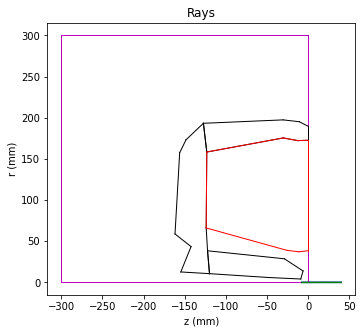

In [32]:
col.plot_rays(coarse_mesh=False,boundary_mesh=True)#,savefile='/home/trh/data/std_oe/30kV/oe_rays.png')

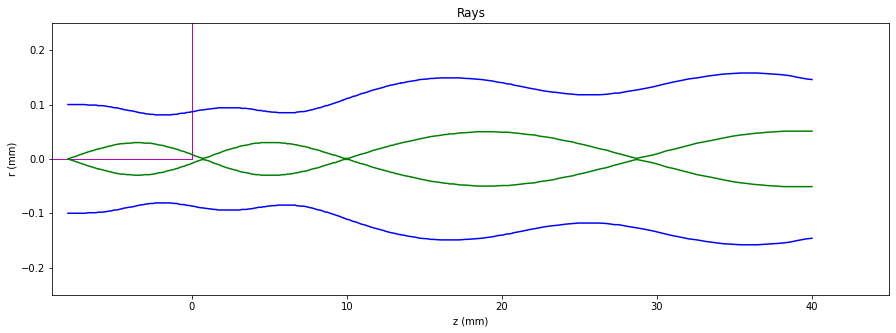

In [51]:
col.plot_rays(ylim=[-0.25,0.25],xlim=[-9,45],equal_aspect=False,coarse_mesh=False,boundary_mesh=True,mirror=True) #,savefile='/home/trh/data/std_oe/30kV/only_rays.png')

In [22]:
help(col.write_raytrace_file)

Help on method write_raytrace_file in module column_io:

write_raytrace_file(mircondfilename, source_pos=90, source_size=200, semiangle=10, energy=200000, initial_direction=180, lens_type='Electrostatic', lens_pos=0, lens_excitation=None, excitation_flag=None, potentials=None, screen_pos=95, relativity=False, cyl_symm=True, r_samples=3, alpha_samples=3, minimum_rays=False, precision=8, n_equipotentials=50) method of column_io.OpticalColumn instance
    Creates an input file for SORAY.exe. Primarily for visualizing columns
    implemented in MIRROR. All physical parameters have same name, units
    and default as in write_mir_img_cond_file(), even when SORAY does not
    share units with MIRROR.
    
    Parameters:
        mircondfilename : path
            full filename to write imaging conditions file to.
    
    Optional parameters:
        source_pos : float
            Source z position (mm). The "source" is the starting 
            position of rays for auto-focusing. 
         